# Submitted by: Jainil Shah
# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
## Algorithm used :-  K means Clustering
## 1. Import Libraries

In [1]:
# working with arrays
import numpy as np
# data visualization and graphical plotting
import matplotlib.pyplot as plt
# it offers data structures and operations for manipulating numerical tables and time series
import pandas as pd
# provides functions for generating a suite of test problems
from sklearn import datasets

# 2. Get The dataset

In [2]:
df = pd.read_csv("D://Machine Learning//Task 2 - Dataset.csv")

In [3]:
# used to return top n (5 by default) rows of a data frame or series.1
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 3. Finding optimum numbers of clusters for K means

In [4]:
# First 4 columns are printed
x = df.iloc[:, [0, 1, 2, 3]].values
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

In [5]:
# unsupervised machine learning algorithms that forms clusters of data based on the similarity between data instances
# number of clusters has to be defined beforehand
# K in the K-means refers to the number of clusters.
from sklearn.cluster import KMeans

In [6]:
# within cluster sum of squares
# For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square )
# WCSS is the sum of squared distance between each point and the centroid in a cluster
#  When we plot the WCSS with the K value, the plot looks like an Elbow
# number of clusters increases, the WCSS value will start to decrease
wcss = []

In [7]:
# To get the values used in the graph, we train multiple models using a different number of clusters 
# and storing the value of the intertia_ property (WCSS) every time.
# k-means++ ensures that you get don’t fall into the random initialization trap.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


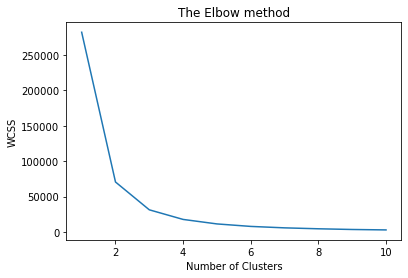

In [8]:
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
# number of clusters increases, the WCSS value will start to decrease
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# Optimum number of clusters: 3

In [9]:
# categorize the data using the optimum number of clusters (3) we determined in the last step
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)

In [10]:
# it finds the centroids and assigns the labels to the dataset
y_kmeans = kmeans.fit_predict(x)

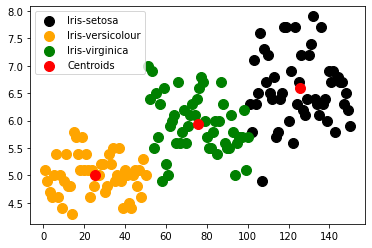

In [11]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters:
# cluster_centers: Predict the closest cluster each sample in X belongs to
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()